In [1]:
import random as rdm
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
import collections as  coll
import numpy as np
import pandas as pnd

### Semilla Aleatoria

In [2]:
np.random.seed(64475)
rdm.seed(64475)

### Crear Demanda Aleatoria
Con una distribución exponencial discreta modificada


In [3]:
i=0
n=100000
w=0
m= 90000
demanda = []
a = np.arange(n)
seleccion = np.random.choice(a,m, replace=False)

for i in range(n):  
    y = round(rdm.expovariate(.2))
    demanda.append(y)

for w in range(m):
    u = seleccion[w]
    demanda[u] = demanda[u] + np.random.poisson(5)


### Grafica del comportamiento de la demanda

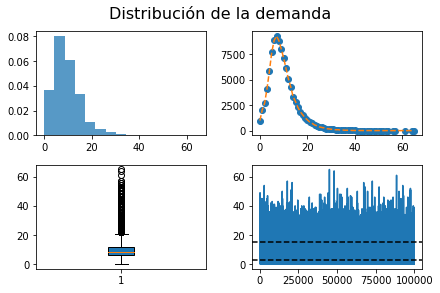

In [4]:
demanda2 = pnd.value_counts(demanda).sort_index()
fig, axs = plt.subplots(nrows=2, ncols=2, constrained_layout=True)
axs[0,0].hist(demanda, bins=15, density=True, alpha=0.75)
axs[0,1].plot(demanda2, 'o', demanda2, '--')
axs[1,0].boxplot(demanda,vert=True,patch_artist=True) 
axs[1,1].plot(demanda)
axs[1,1].axhline(y=15, color="black", linestyle="--")
axs[1,1].axhline(y=3, color="black", linestyle="--")
fig.suptitle('Distribución de la demanda', fontsize=16)
plt.show()

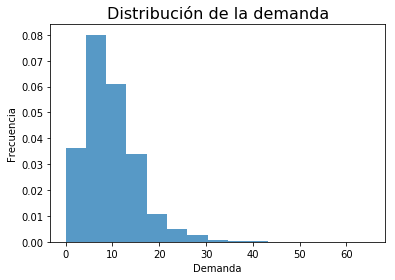

In [13]:
plt.hist(demanda, bins=15, density=True, alpha=0.75)
plt.title('Distribución de la demanda', fontsize=16)
plt.xlabel("Demanda")
plt.ylabel("Frecuencia")
plt.show()

### Determinar comportamiento del Almacen
Con capacidad maxima de 50 y un limite inferior del 20% de su maximo

In [34]:
t = 0
K = 50
Li= 13
cantidadPedido = 0
almacen = K
almacenFinal = [K]
pedidos = []
while(t<n):
    if(almacen<Li):
        if(almacen<0):
            cantidadPedido = K
            almacen = cantidadPedido
            almacen = almacen - demanda[t]
            pedidos.append(cantidadPedido)
        else:
            cantidadPedido = (K-almacen)
            almacen = almacen + cantidadPedido
            almacen = almacen - demanda[t]
            pedidos.append(cantidadPedido)
    else:
        almacen = almacen - demanda[t]
        almacen = almacen
    t= t+1
    almacenFinal.append(almacen)
    

### Matriz de Probabilidades

In [15]:
transiciones = []
for i in range(1, len(almacenFinal)):
    if(almacenFinal[i]<0):
        transiciones.append(str(almacenFinal[i-1])+ "-" + str(0))
    else:
        if(almacenFinal[i-1]<0):
            transiciones.append(str(0)+ "-" + str(almacenFinal[i]))
        else:
            transiciones.append(str(almacenFinal[i-1])+ "-" + str(almacenFinal[i]))

u= coll.Counter(transiciones)
            
i=0
ciclo0= []
uno = []
ciclo = []
while(i<51):
    uno.append(i)
    i=i+1

i=0
l=0
while(i<51):
    while(l<51):
        ciclo.append(str(uno[i]) + ('-') + str(uno[l]))
        l=l+1
    l=0
    i=i+1


i=0
rep= []
while(i<2601):
    rep.append(u[ciclo[i]])
    i=i+1
    
i=0
datos=[]
repeticion=[]
while(i<2601):
    repeticion= [ciclo[i],rep[i]]
    datos.append(repeticion)
    i=i+1

datos=np.matrix(datos)

i=0
l=0
total=[]
tota=0
ttl=0
while(i<2601):
    while(l<51):
        ttl = int(datos[i,1])
        tota = ttl + tota
        l =l+1
        i=i+1
    l=0
    total.append(tota)
    tota=0
    
x=0
i=0
l=0
pro=0
probabilidad=[]
while(i<2601):
    while(l<51):
        pro = round(((int(datos[i,1]))/total[x]),3)
        probabilidad.append(pro)
        l=l+1
        i=i+1
    x=x+1
    l=0
    
lol = lambda lst, sz: [lst[i:i+sz] for i in range(0, len(lst), sz)] 
matrizProbabilidad =np.matrix(lol(probabilidad,51))
matrizProbabilidad[13,13]



0.01

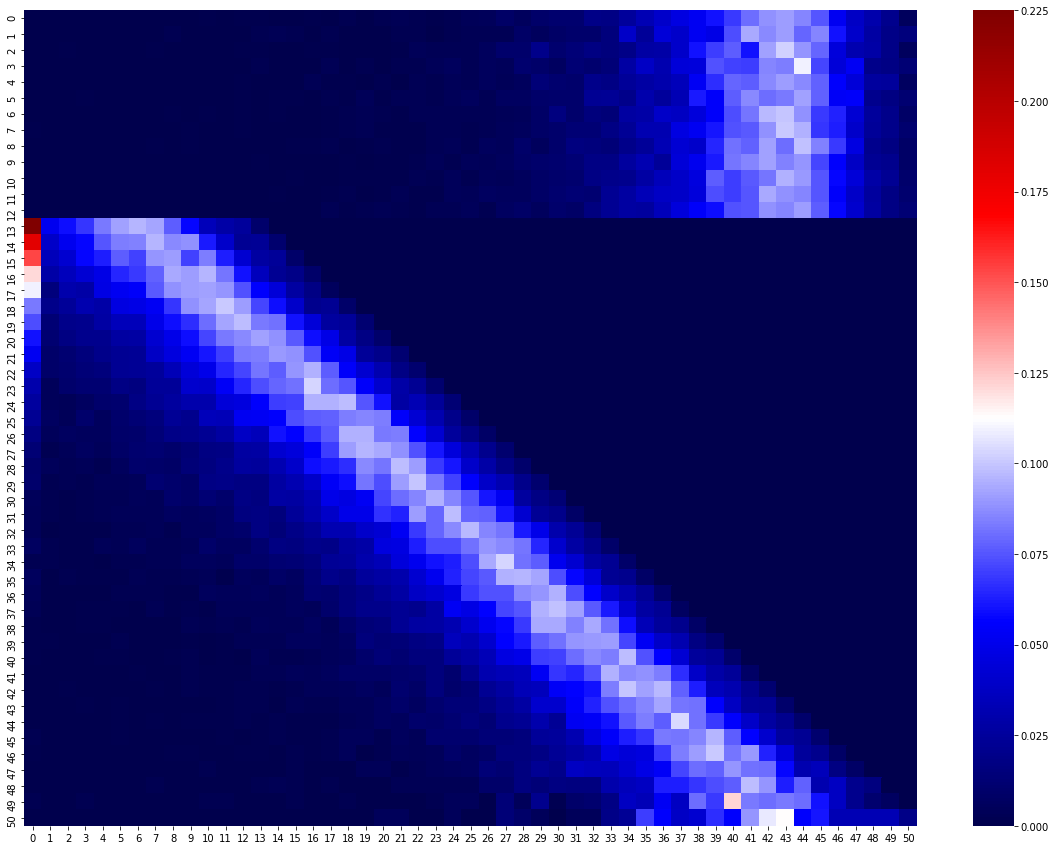

In [16]:
plt.figure(figsize=(20,15))
sns.heatmap(matrizProbabilidad, cmap="seismic")

### Grafica del comportamiento del Almacen

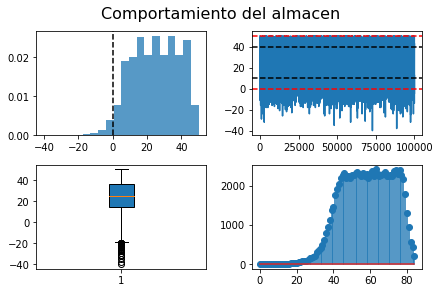

In [17]:
almacenFinal2 = pnd.value_counts(almacenFinal).sort_index()
fig, axs = plt.subplots(nrows=2, ncols=2, constrained_layout=True)
axs[0,0].hist(almacenFinal, bins=20, density=True, alpha=0.75)
axs[0,0].axvline(x=0, color="black", linestyle="--")
axs[1,1].stem(almacenFinal2)
axs[1,0].boxplot(almacenFinal,vert=True,patch_artist=True) 
axs[0,1].plot(almacenFinal)
axs[0,1].axhline(y=50, color="red", linestyle="--")
axs[0,1].axhline(y=0, color="red", linestyle="--")
axs[0,1].axhline(y=40, color="black", linestyle="--")
axs[0,1].axhline(y=10, color="black", linestyle="--")
fig.suptitle('Comportamiento del almacen', fontsize=16)
plt.show()

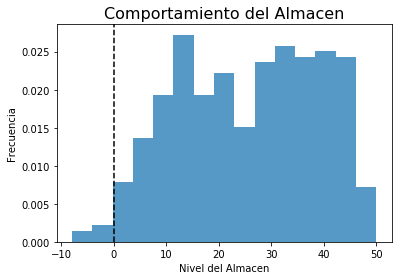

In [37]:
plt.hist(almacenFinal, bins=15, density=True, alpha=0.75)
plt.title('Comportamiento del Almacen', fontsize=16)
plt.axvline(x=0, color="black", linestyle="--")
plt.xlabel("Nivel del Almacen")
plt.ylabel("Frecuencia")
plt.show()

### Demanda no Satisfecha por falta de producto

In [18]:
i=0
demandaNoSatisfecha = 0
numeroDiasInventario0  = 0

while(i<n):
    if(almacenFinal[i]<0):
        demandaNoSatisfecha= (almacenFinal[i]*-1) + demandaNoSatisfecha
        numeroDiasInventario0 = 1 + numeroDiasInventario0 
    i=i+1

print(numeroDiasInventario0, demandaNoSatisfecha)
    

2353 13143


### Perdida por no venta

In [19]:
perdidaNoVenta = demandaNoSatisfecha * 250
print(perdidaNoVenta)

3285750


### Numero de Pedidos 

In [20]:
i=0
numeroPedidos = 0

while(i<n):
    if(almacenFinal[i]<Li):
        numeroPedidos = 1 + numeroPedidos
    i=i+1

print(numeroPedidos)

21650


### Cantidad de los Pedidos

In [21]:
pedidos        

[49,
 41,
 39,
 44,
 41,
 40,
 41,
 39,
 39,
 42,
 40,
 39,
 39,
 42,
 44,
 42,
 47,
 44,
 39,
 43,
 42,
 50,
 43,
 41,
 38,
 50,
 38,
 50,
 38,
 46,
 44,
 38,
 38,
 46,
 40,
 50,
 41,
 41,
 42,
 45,
 50,
 38,
 39,
 41,
 38,
 41,
 40,
 38,
 50,
 43,
 39,
 38,
 48,
 43,
 39,
 40,
 40,
 38,
 38,
 38,
 50,
 49,
 43,
 49,
 44,
 40,
 41,
 42,
 40,
 49,
 43,
 40,
 40,
 50,
 50,
 41,
 38,
 38,
 47,
 41,
 41,
 43,
 40,
 42,
 39,
 47,
 39,
 46,
 47,
 44,
 50,
 40,
 39,
 41,
 39,
 41,
 45,
 39,
 41,
 40,
 42,
 50,
 43,
 44,
 41,
 48,
 41,
 38,
 39,
 50,
 40,
 50,
 44,
 42,
 41,
 47,
 42,
 40,
 42,
 49,
 39,
 46,
 43,
 41,
 45,
 40,
 44,
 41,
 46,
 38,
 38,
 50,
 38,
 42,
 44,
 43,
 41,
 42,
 42,
 40,
 40,
 50,
 50,
 46,
 42,
 43,
 47,
 49,
 48,
 40,
 43,
 50,
 41,
 48,
 43,
 42,
 42,
 40,
 47,
 38,
 41,
 43,
 40,
 45,
 49,
 39,
 39,
 42,
 45,
 39,
 44,
 41,
 50,
 44,
 47,
 40,
 42,
 41,
 40,
 38,
 38,
 39,
 40,
 50,
 49,
 50,
 38,
 40,
 41,
 40,
 45,
 41,
 41,
 40,
 41,
 40,
 45,
 46,
 45,
 40,


### Grafica del comportamiento de la cantidad de pedidos


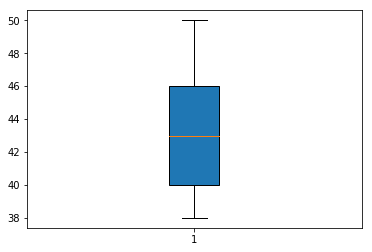

In [22]:
plot =plt.boxplot(pedidos,vert=True,patch_artist=True)
plt.show()

### Costo de los pedidos

In [23]:
i = 0
costoPedidos = []
while(i<numeroPedidos):
    if(pedidos[i]<30):
        x = pedidos[i]*25
    if(pedidos[i]<50):
        x = pedidos[i]*20
    if(pedidos[i]>49):
        x = pedidos[i]*15
    i= i+1
    costoPedidos.append(x)
    
costoPedido=sum(costoPedidos)

### Costo Almacen

In [24]:
i=0
costoAlmacen = []
while(i<n):
    if(almacenFinal[i]>25):
        x = 20
    if(almacenFinal[i]<26):
        x = 10
    costoAlmacen.append(x)
    i=i+1
    
costoAlmacen = sum(costoAlmacen)
costoAlmacen

1489030

In [26]:
Li    = 0
Datos = []
total2 = []
while(Li<51):    
    p   = 0
    NP  = []
    CPS = []
    DNS = []
    CAS = []
    while(p<1000):
        i = 0 
        w = 0
        n = 360
        m = 300
        a = np.arange(n)
        demanda   = []
        seleccion = np.random.choice(a,m, replace=False)

        for i in range(n):  
            y = round(rdm.expovariate(.2))
            demanda.append(y)
        for w in range(m):
            u = seleccion[w]
            demanda[u] = demanda[u] + np.random.poisson(5)

        t = 0
        K = 50
        cantidadPedido = 0
        almacen        = K
        almacenFinal   = [K]
        pedidos        = []

        while(t<n):
            if(almacen<Li):
                if(almacen<0):
                    cantidadPedido = K
                    almacen = cantidadPedido
                    almacen = almacen - demanda[t]
                    pedidos.append(cantidadPedido)
                else:
                    cantidadPedido = (K-almacen)
                    almacen = almacen + cantidadPedido
                    almacen = almacen - demanda[t]
                    pedidos.append(cantidadPedido)
            else:
                almacen = almacen - demanda[t]
            t= t+1
            almacenFinal.append(almacen)

        i=0
        costoAlmacen        = []
        numeroPedidos       = 0
        demandaNoSatisfecha = 0

        while(i<n):
            if(almacenFinal[i]<0):
                demandaNoSatisfecha= (almacenFinal[i]*-1) + demandaNoSatisfecha
            if(almacenFinal[i]<Li):
                numeroPedidos = 1 + numeroPedidos
            if(almacenFinal[i]>25):
                x = 20
            if(almacenFinal[i]<26):
                x = 10
            costoAlmacen.append(x)
            i=i+1
        
        i = 0
        costoPedidos = []
        while(i<numeroPedidos):
            if(pedidos[i]<11):
                x = pedidos[i]*70
            if(pedidos[i]<21):
                x = pedidos[i]*60
            if(pedidos[i]<31):
                x = pedidos[i]*50
            if(pedidos[i]>41):
                x = pedidos[i]*40
            if(pedidos[i]>51):
                x = pedidos[i]*30
            i= i+1
            costoPedidos.append(x) 

        NP.append(numeroPedidos)
        CPS.append(sum(costoPedidos))
        DNS.append(demandaNoSatisfecha)
        CAS.append(sum(costoAlmacen))

        p=p+1

    CP = (sum(CPS)/(p))
    CA = round((sum(CAS)/(p)),0)
    PNV = (round((sum(DNS)/(p)),0) * 250)
    NP = round((sum(NP)/(p)),0)
    DNS = round((sum(DNS)/(p)),0)

    total = round((CA + CP + PNV),0)
    total2.append(total)
    uli = [Li, CA, NP, CP, DNS, PNV, total]
    Datos.append(uli)
    Li = Li+1
  
num = total2.index(np.amin(total2))


In [27]:
Limite =  np.take(Datos,0,1)
total =  np.take(Datos,6,1)

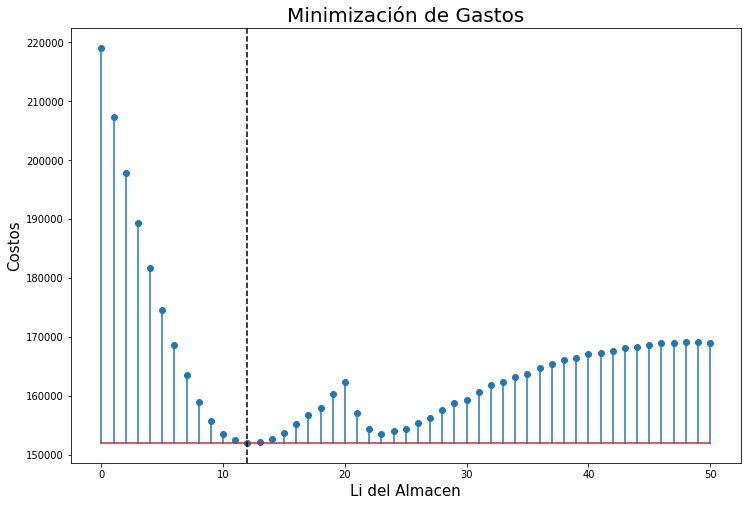

In [32]:
plt.figure(figsize=(12,8))
plot = plt.stem(Limite, total, bottom= np.amin(total))
plt.axvline(x= num, color="black", linestyle="--")
plt.title("Minimización de Gastos", fontsize=20)
plt.xlabel("Li del Almacen", fontsize=15)
plt.ylabel("Costos", fontsize=15)
plt.show()

In [25]:
Datos

[[0, 4982.0, 58.0, 115120.0, 392.0, 98000.0, 218102.0],
 [1, 5007.0, 58.0, 116900.0, 337.0, 84250.0, 206157.0],
 [2, 5033.0, 59.0, 118488.0, 294.0, 73500.0, 197021.0],
 [3, 5067.0, 61.0, 120414.0, 255.0, 63750.0, 189231.0],
 [4, 5089.0, 62.0, 122242.8, 209.0, 52250.0, 179582.0],
 [5, 5108.0, 63.0, 123660.0, 186.0, 46500.0, 175268.0],
 [6, 5155.0, 65.0, 125241.2, 156.0, 39000.0, 169396.0],
 [7, 5170.0, 65.0, 125567.2, 129.0, 32250.0, 162987.0],
 [8, 5209.0, 67.0, 126224.0, 108.0, 27000.0, 158433.0],
 [9, 5238.0, 68.0, 127368.4, 91.0, 22750.0, 155356.0],
 [10, 5293.0, 70.0, 129050.9, 80.0, 20000.0, 154344.0],
 [11, 5315.0, 72.0, 131795.0, 67.0, 16750.0, 153860.0],
 [12, 5347.0, 73.0, 133650.6, 54.0, 13500.0, 152498.0],
 [13, 5398.0, 74.0, 135100.9, 45.0, 11250.0, 151749.0],
 [14, 5440.0, 76.0, 138190.9, 37.0, 9250.0, 152881.0],
 [15, 5476.0, 78.0, 141100.5, 31.0, 7750.0, 154326.0],
 [16, 5517.0, 80.0, 142296.4, 25.0, 6250.0, 154063.0],
 [17, 5574.0, 82.0, 145511.2, 23.0, 5750.0, 156835.0